# Introduction to Matplotlib

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

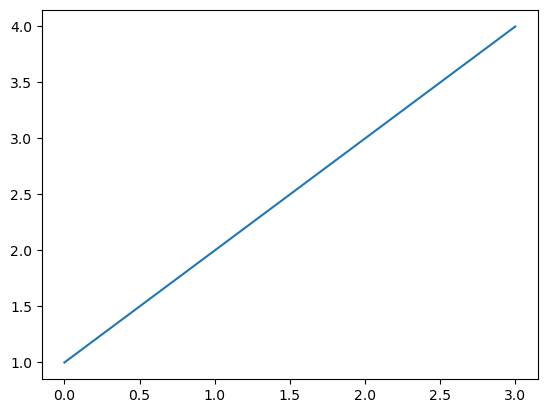

In [5]:
plt.plot([1, 2, 3, 4])
plt.show()

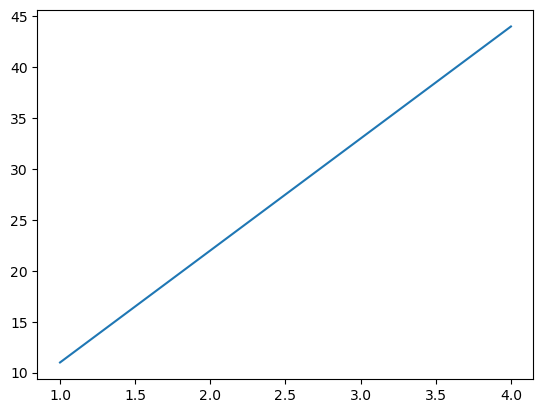

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)
plt.show()

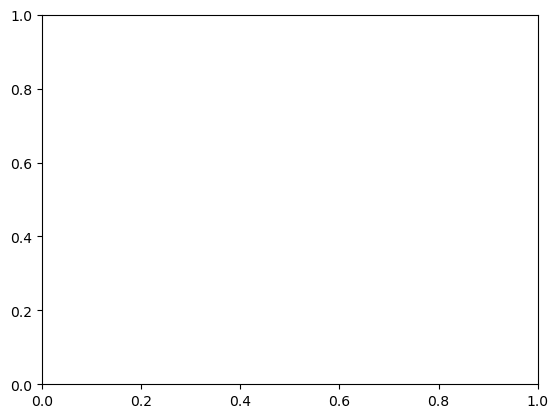

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

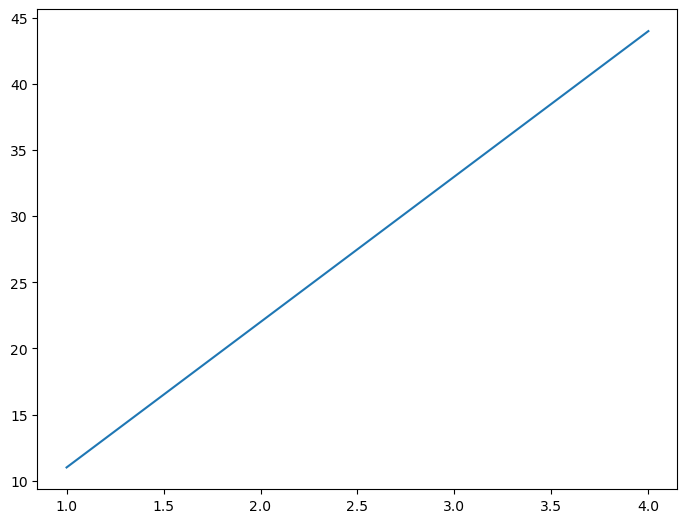

In [8]:
# 2st method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

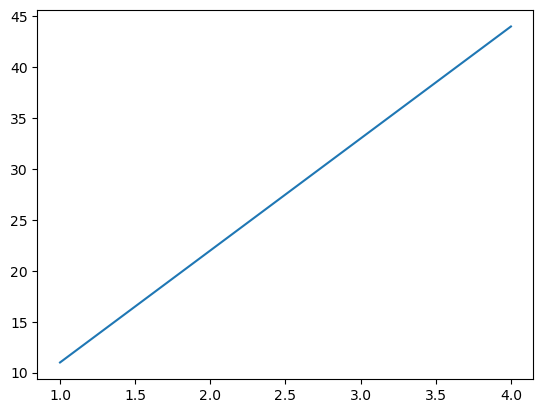

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

In [9]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y) # add some data
plt.show()
type(fig), type(ax)

### Matplotlib example workflow

In [10]:
# 0. Import matploblib and get it ready for plotting in Jupyter
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("images/sample-plot.png")

### Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplot

In [11]:
import numpy as np

In [12]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

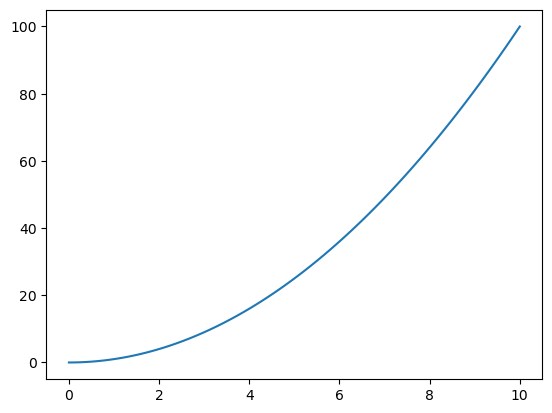

In [ ]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);
plt.show()

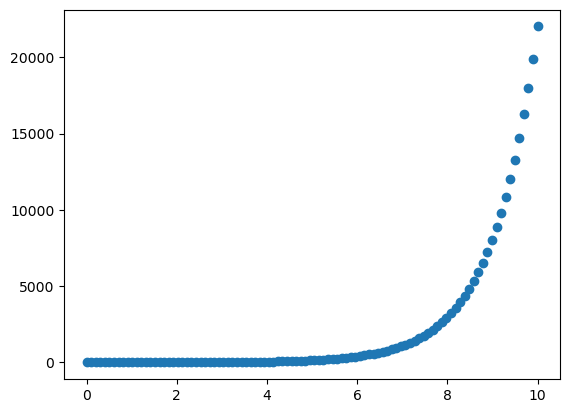

In [16]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));
plt.show()

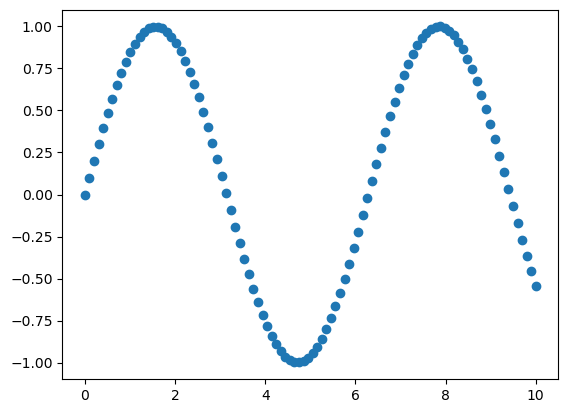

In [17]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));
plt.show()

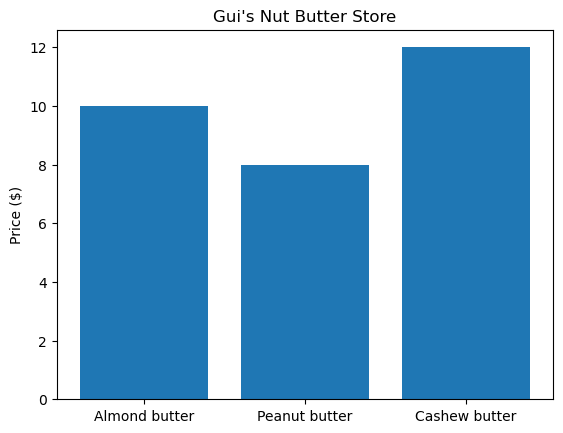

In [23]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Gui's Nut Butter Store", ylabel="Price ($)")
plt.show();

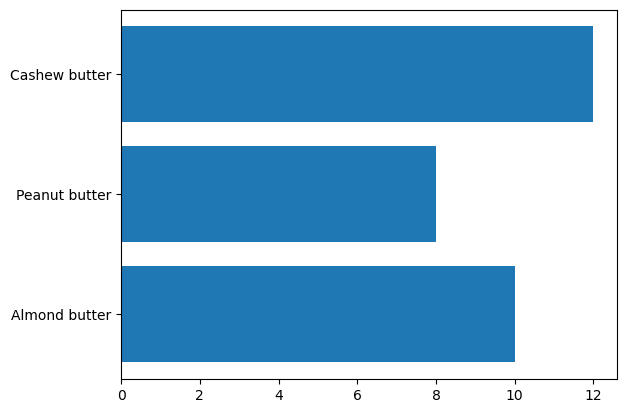

In [24]:
fig, ax = plt.subplots()
ax.barh(nut_butter_prices.keys(), nut_butter_prices.values())
plt.show();

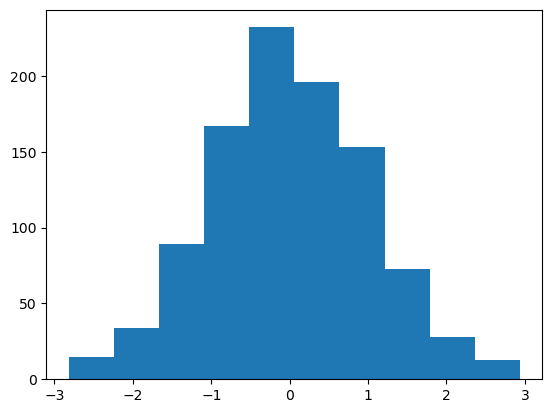

In [ ]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)
plt.show();

### Two options for subplots

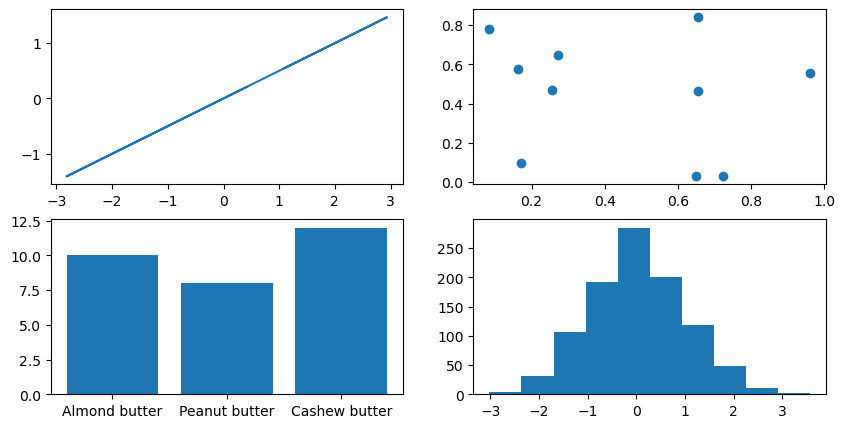

In [ ]:
# Subplost option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))


# Plot to each different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000))

plt.show();

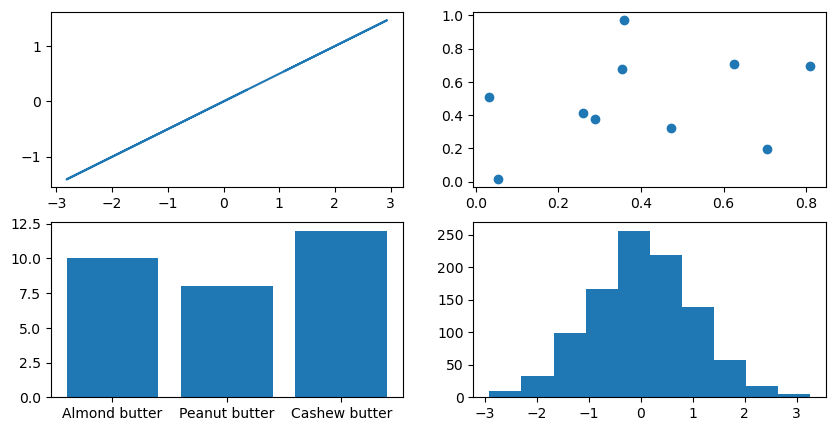

In [34]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(np.random.randn(1000))

plt.show();